In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-adult-income-update/census.csv
/kaggle/input/us-adult-income-update/train.csv
/kaggle/input/us-adult-income-update/test.csv


# DATASET

CharityML is a fictitious charity/non-profit organization located in the heart of Silicon Valley that was established to provide financial support for people and it survives only on donations. After nearly 32,000 letters were sent to people in the community, CharityML determined that every donation they received came from someone that was making more than $50,000 annually. To expand their potential donor base, CharityML has decided to send letters to residents of California, but to only those most likely to donate to the charity. With nearly 15 million working Californians, CharityML has brought you on board to help build an algorithm to best identify potential donors and reduce overhead cost of sending mail.

Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with. While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features.

In this project, we will employ several Machine Learning algorithms of to accurately model individuals' income using data collected from the 1994 U.S. Census. The ultimate goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000.

The dataset for this project basically originates from the UCI Machine Learning Repository. (University of California, Irvine, School of Information and Computer Science, Center for Machine Learning and Intelligent Systems) The UCI Machine Learning Repository is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms. The archive was created as an ftp archive in 1987 by David Aha and fellow graduate students at UC Irvine. Since that time, it has been widely used by students, educators, and researchers all over the world as a primary source of machine learning data sets.

https://archive.ics.uci.edu/ml/datasets/census+income

The dataset- "Adult data"(also known as *"Census Income"* dataset) was donated by Ron Kohavi and Barry Becker, to predict whether income exceeds $50K/yr based on census data , after being published in the article "Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid".

# METHODOLOGY

1. Data Exploration
2. Data Visulaization
3. Data Preparation & Modelling

* Dropping all the rows with missing values, and the Data Handling & Modelling
    * Missing Value Treatment- Dropping the rows
    * Data Handling
     * Training using supervised ML algorithms
        * Logistic Regression Classifier
        * Support Vector Classifier
        * Random Forest Classifier
    * Testing
    * Model Evaluation-
    * Training, Testing & Model Evaluation with Balanced class weights
    * Performing Feature Selection before Training, Testing & Model Evaluation
    * Performing Feature selection before training, testing & model evaluation with balanced weights
* Imputing Missing values in Data Preprocessing Pipeline
    * Splitting the dataset
    * Creating preprocessing pipeline for data handling
    * Training, Testing and Model Evaluation
    * Training, Testing & Model Evaluation with Balanced class weights
    * Performing Feature Selection before Modelling
    * Performing Feature selection before Modelling with balanced weights
* Data Modelling using SMOTE for resampling Imbalanced Target data
* Data Modelling using SMOTE and RandomUnderSampler for resampling Imbalanced Target Data

# DATA EXPLORATION

Listing of attributes:

salary: >50K, <=50K
age: continuous
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
fnlwgt: continuous
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
education-num: continuous
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
sex: Female, Male
capital-gain: continuous
capital-loss: continuous
hours-per-week: continuous
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
SUMMARY

Data Set Characteristics: Multivariate
Area: Social
Attribute Characteristics: Categorical, Integer
Number of Attributes: 14
Date Donated: 1996-05-01
Associated Tasks: Classification
Missing Values? Yes
Temporal coverage: 1994-01-01to1994-12-31
Spatial coverage: USA

In [2]:
filename = '/kaggle/input/us-adult-income-update/census.csv'
df = pd.read_csv(filename)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
#Finding the special characters in the data frame 
df.isin(['?']).sum(axis=0)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

There are 15 variables in the dataset- 14 independent and 1 dependant, i.e target variable- income

It is obsereved that dataset contains missing values that are marked with a question mark character (?).

In [5]:
# code will replace the special character to nan and then drop the columns 
df['native-country'] = df['native-country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [6]:
df.shape

(48842, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
# Statistical summary
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#statistical sumaary -categorical features
df.describe(include=object)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


Above two codes give us Statistical summary of numerical and categorical features. Individual unique value for each numeric feature is given below.

In [10]:
num_fea = df.select_dtypes(include=['int64', 'float64']).columns
for c in df[num_fea]:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
---- fnlwgt ---
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64
---- education-num ---
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: education-num, dtype: int64
---- capital-gain ---
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: capital-gain, Length: 123, dtype: int64
---- capital-loss ---
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1

# DATA VISUALIZATION

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


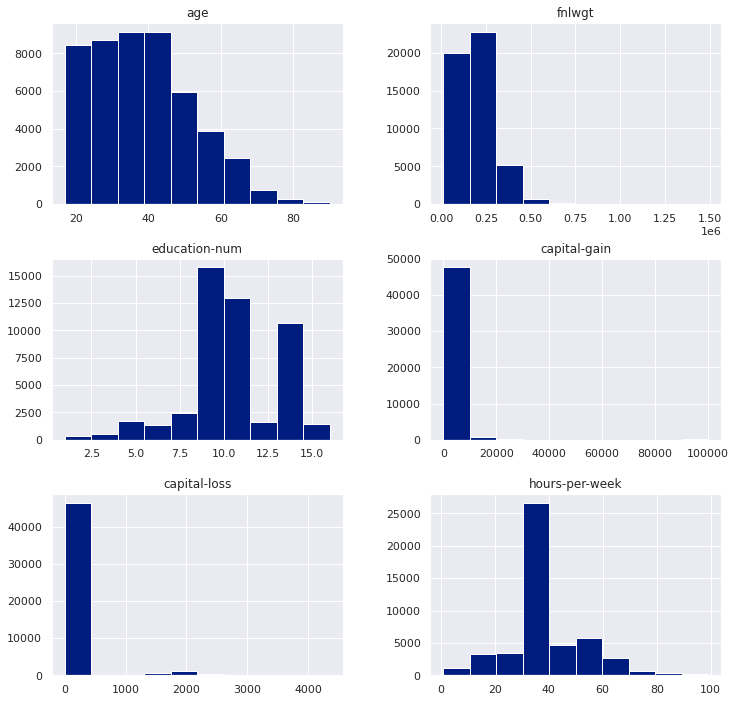

In [12]:
# Histogram for numeric values 
plt.style.use("seaborn-dark-palette")
df[num_fea].hist(figsize = (12,12))
plt.show()

Capital loss and capital gain are skewed.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

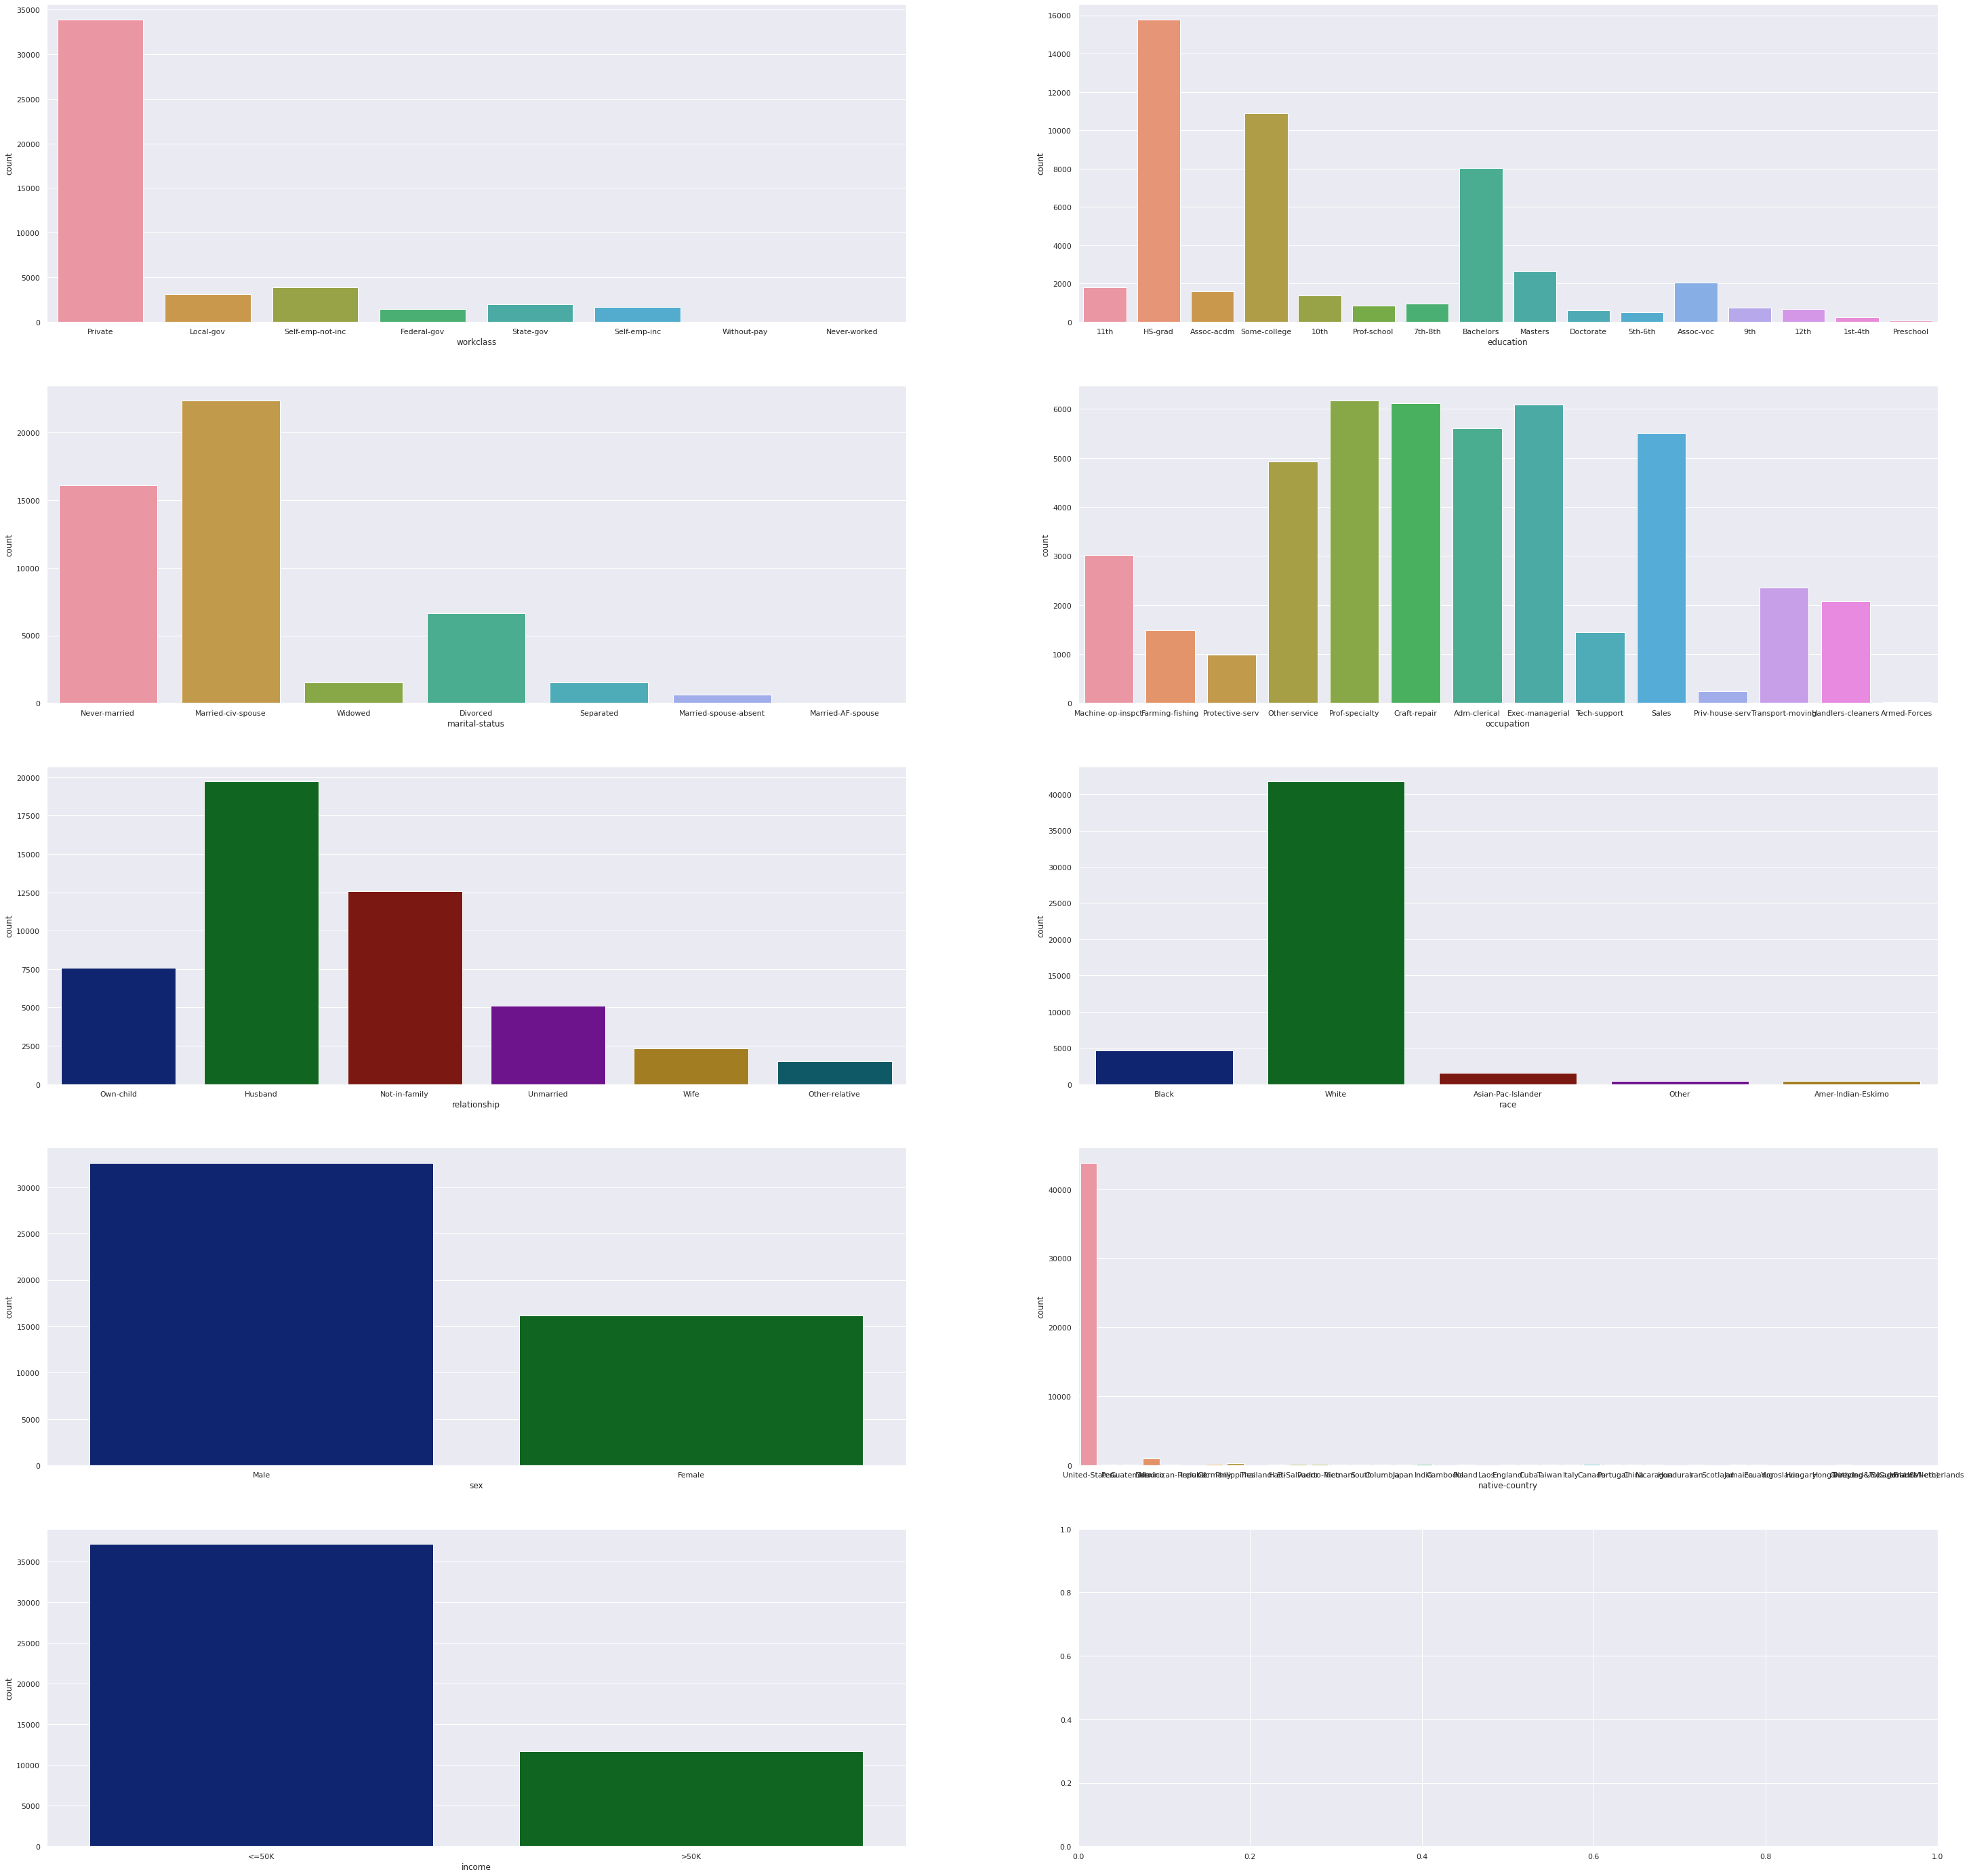

In [13]:
# count plot for categorical features
cat_fea = df.select_dtypes(include=['object']).columns
fig, ax = plt.subplots(nrows=5, ncols=2, figsize = (50, 50))
for variable, subplot in zip(df[cat_fea], ax.flatten()):
  sns.countplot(df[variable],ax = subplot)
plt.show()

In [14]:
s=df.income
counts=s.value_counts()
percentage= s.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
pd.DataFrame({"Count": counts, "%": percentage })

# alternate way
# from collections import Counter
# counter = Counter(df["income"])
# for k,v in counter.items():
	# per = v / len(df["income"]) * 100
	# print('Class=%s, Count=%d, Percentage=%.2f%%' % (k, v, per))

,Count,%
<=50K,37155,76.07%
>50K,11687,23.93%


        Count       %
Male    32650  66.85%
Female  16192  33.15%


Text(0.5, 1.0, 'Gender distribution')

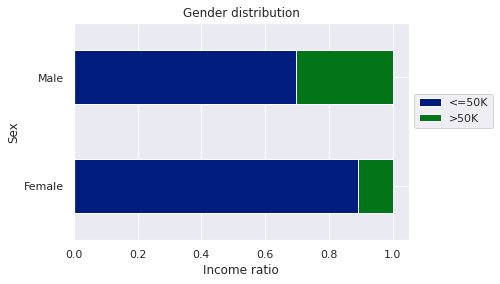

In [15]:
# Gender ratio
t=df.sex
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = df.groupby(['sex', 'income']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Sex')
plt.xlabel('Income ratio')
plt.title("Gender distribution")

<AxesSubplot:>

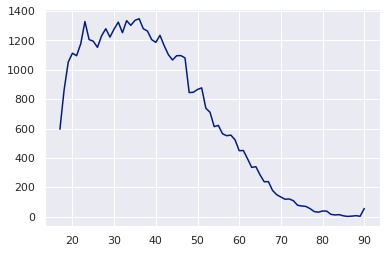

In [16]:
# Age distribution in the datset
df['age'].value_counts().sort_index().plot.line()

In [17]:
rich = df.loc[df['income'] == '>50K', 'age']
poor = df.loc[df['income'] == '<=50K', 'age']
print("The average age of the rich: {0} +- {1} years, poor - {2} +- {3} years.".format(
    round(rich.mean()), round(rich.std(), 1),
    round(poor.mean()), round(poor.std(), 1)))

The average age of the rich: 44 +- 10.6 years, poor - 37 +- 14.1 years.


<AxesSubplot:>

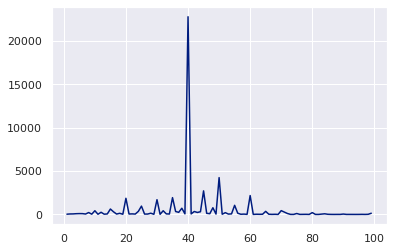

In [18]:
# hours per week distribution; hours per week vs income
df['hours-per-week'].value_counts().sort_index().plot.line()

In [19]:
# Individuals working for more hours per week and with higher income 
max_load = df['hours-per-week'].max()
print("Max time - {0} hours./week.".format(max_load))

num_workaholics = df[df['hours-per-week'] == max_load].shape[0]
print("Total number of such hard workers {0}".format(num_workaholics))

rich_share = float(df[(df['hours-per-week'] == max_load)
                 & (df['income'] == '>50K')].shape[0]) / num_workaholics
print("Percentage of rich among them {0}%".format(int(100 * rich_share)))

Max time - 99 hours./week.
Total number of such hard workers 137
Percentage of rich among them 29%


In [20]:
# Getting average working hour per country with income
pd.crosstab(df['native-country'], df['income'], 
           values=df['hours-per-week'], aggfunc=np.mean)

income,<=50K,>50K
native-country,,
Cambodia,41.157895,43.888889
Canada,37.378151,46.126984
China,36.686047,42.027778
Columbia,39.123457,56.250000
Cuba,39.201923,42.852941
Dominican-Republic,41.561224,42.800000
Ecuador,37.948718,47.833333
El-Salvador,35.819444,43.454545
England,39.375000,46.297872


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'input data numbers')

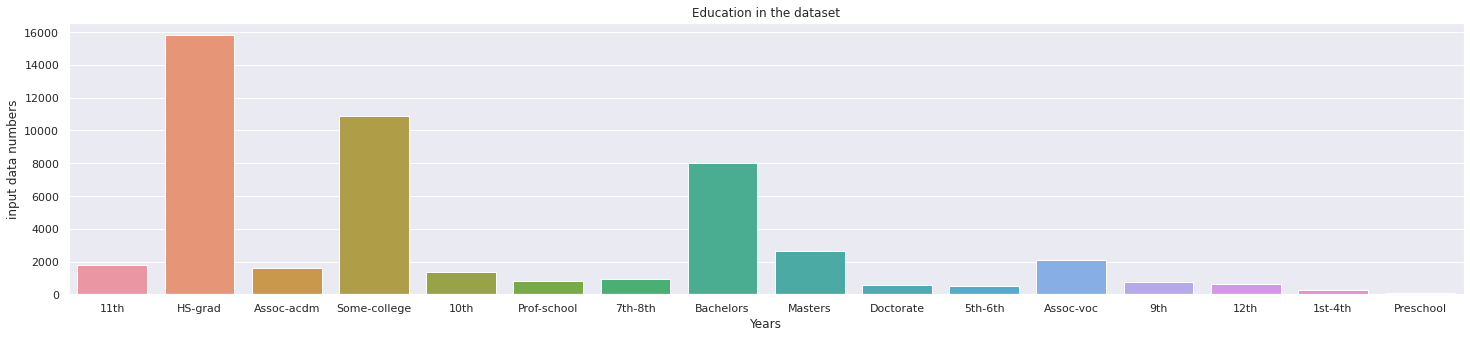

In [21]:
#education
plt.figure(figsize=(25, 5))
sns.countplot(df['education'])
plt.title('Education in the dataset')
plt.xlabel('Years')
plt.ylabel('input data numbers')

Text(0.5, 1.0, 'Education distribution')

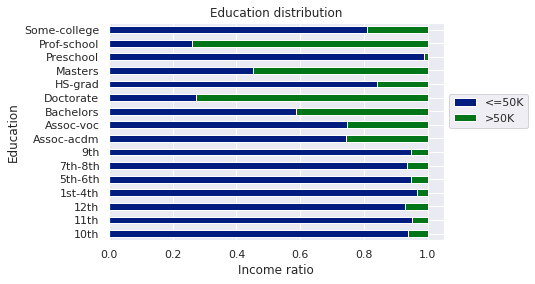

In [22]:
#eductaion distribution; 
edu_group = df.groupby(['education', 'income']).size().unstack()
edu_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False) # apply(lambda x:x/x.sum(), axis=1) is used to get percentage Bar plots
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Education')
plt.xlabel('Income ratio')
plt.title("Education distribution")

It is observed that

1) In the datatset we have large number of highschool graduates.

2) People with higher education- Doctorate, Masters and those studied at professional schools tend to earn more than other cateogory

Text(0.5, 1.0, 'Workclass distribution')

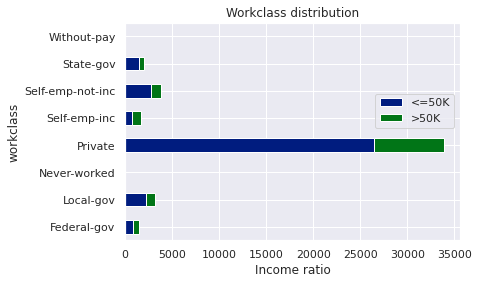

In [23]:
# Workclass distribution; workclass vs income
wrkcls = df.groupby(['workclass', 'income']).size().unstack()
wrkcls.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('workclass')
plt.xlabel('Income ratio')
plt.title("Workclass distribution")

Text(0.5, 1.0, 'Occupation distribution')

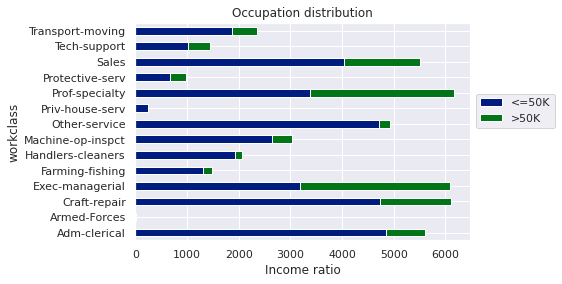

In [24]:
# occupation vs income
occu = df.groupby(['occupation', 'income']).size().unstack()
occu.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('workclass')
plt.xlabel('Income ratio')
plt.title("Occupation distribution")

Text(0.5, 1.0, 'Race distribution')

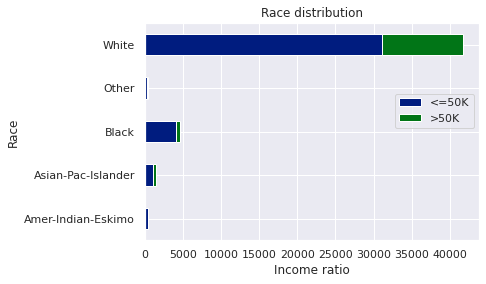

In [25]:
# race distribution; race vs income
race = df.groupby(['race', 'income']).size().unstack()
race.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Race')
plt.xlabel('Income ratio')
plt.title("Race distribution")

Text(0.5, 1.0, 'Relationship')

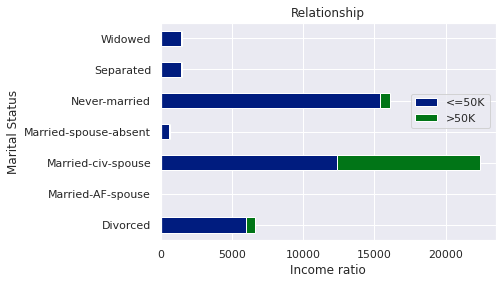

In [26]:
# marital status
marital = df.groupby(['marital-status', 'income']).size().unstack()
marital.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Marital Status')
plt.xlabel('Income ratio')
plt.title("Relationship")

In [27]:
#married male with higher income
df.loc[(df['sex'] == 'Male') &
     (df['marital-status'].str.startswith('Married')), 'income'].value_counts()

<=50K    11318
>50K      8917
Name: income, dtype: int64

In [28]:
#married female with higher income
df.loc[(df['sex'] == 'Female') &
     (df['marital-status'].str.startswith('Married')), 'income'].value_counts()

<=50K    1670
>50K     1139
Name: income, dtype: int64

# DATA PREPARATION & MODELLING

array([<AxesSubplot:title={'center':'capital-loss'}>], dtype=object)

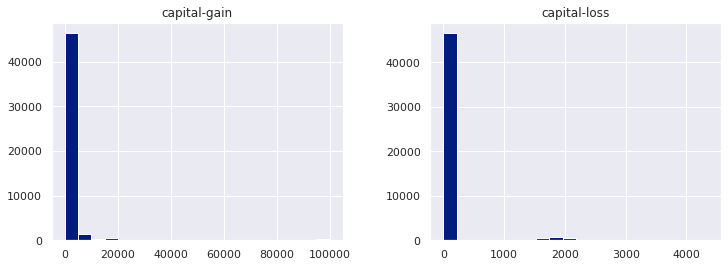

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
df.hist('capital-gain', bins=20, ax=axes[0])
df.hist('capital-loss', bins=20, ax=axes[1])

In [30]:
skewed = ['capital-gain', 'capital-loss']
df[skewed] = df[skewed].apply(lambda x: np.log(x + 1))
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,8.947546,0.0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0.000000,0.0,30,United-States,<=50K


array([<AxesSubplot:title={'center':'capital-loss'}>], dtype=object)

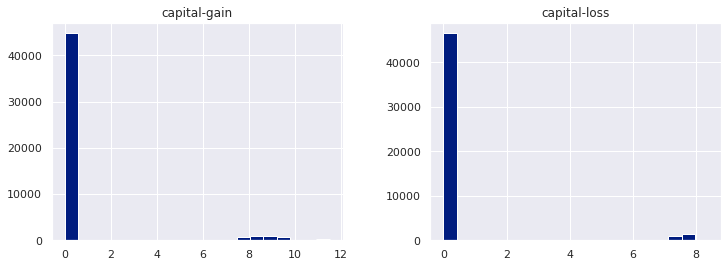

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
df.hist('capital-gain', bins=20, ax=axes[0])
df.hist('capital-loss', bins=20, ax=axes[1])

In [32]:
# fnlwgt sampling weight, this is the number of people the census believes the entry represents, which doesnot help in predicting income, hence dropping it.
# The column education is just a string representation of the column education-num. We will drop the education column.
df.drop(['fnlwgt', 'education'], axis=1, inplace=True)
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,8.947546,0.0,40,United-States,>50K
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0.000000,0.0,30,United-States,<=50K


# Dropping all the rows with missing values, data handling and Modelling

* Missing value Treatment

In [33]:
#dropping the NaN rows now
df_drop= pd.DataFrame(df, columns=df.columns,index=df.index) 
df_drop.dropna(how='any',inplace=True)

In [34]:
X=df_drop.drop('income', axis = 1)
Y=pd.DataFrame(df_drop["income"], columns=['income'])
print(X)
print(Y)

       age     workclass  education-num      marital-status  \
0       25       Private              7       Never-married   
1       38       Private              9  Married-civ-spouse   
2       28     Local-gov             12  Married-civ-spouse   
3       44       Private             10  Married-civ-spouse   
5       34       Private              6       Never-married   
...    ...           ...            ...                 ...   
48837   27       Private             12  Married-civ-spouse   
48838   40       Private              9  Married-civ-spouse   
48839   58       Private              9             Widowed   
48840   22       Private              9       Never-married   
48841   52  Self-emp-inc              9  Married-civ-spouse   

              occupation   relationship   race     sex  capital-gain  \
0      Machine-op-inspct      Own-child  Black    Male      0.000000   
1        Farming-fishing        Husband  White    Male      0.000000   
2        Protective-serv   

In [35]:
X.shape

(45222, 12)

* Data Handling

In [36]:
# One hot-encoding encoding categorical features- of training set
cat_iX = X.select_dtypes(include=['object', 'bool']).columns
#cat_iX= ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
data1= X[cat_iX] 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
#Rename for sklearn OHE
enc_missing = SimpleImputer(strategy="most_frequent",fill_value="missing")
enc_missing.fit(data1)
data1 = pd.DataFrame(enc_missing.transform(data1),columns=data1.columns,index=data1.index)
# Perform OHE:
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc_X=OHE.fit_transform(data1)
column_name= OHE.get_feature_names(['workclass','marital-status','occupation','relationship','race','sex','native-country'])
encoded_X= pd.DataFrame(enc_X,columns=column_name, index=data1.index)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
encoded_X.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
encoded_X.shape

(45222, 82)

In [39]:
num_iX = X.select_dtypes(include=['int64','float64']).columns
dat=pd.DataFrame(X[num_iX],columns=['age','education-num', 'capital-gain', 'capital-loss', 'hours-per-week'], index= data1.index)
finlX=pd.concat([dat,encoded_X],axis=1)

In [40]:
finlX.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0.000000,0.0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,9,0.000000,0.0,50,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,12,0.000000,0.0,40,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,10,8.947546,0.0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,34,6,0.000000,0.0,30,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
finlX.shape, Y.shape

((45222, 87), (45222, 1))

In [42]:
Y.head()

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
5,<=50K


In [43]:
# Train test split
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(finlX,Y,test_size=0.30, random_state=42,shuffle=True)
print('trainX:',trainX.shape)
print('trainY:',trainY.shape)
print('testX:',testX.shape)
print('testY:',testY.shape)

trainX: (31655, 87)
trainY: (31655, 1)
testX: (13567, 87)
testY: (13567, 1)


In [44]:
trainX.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
28065,38,14,8.895493,0.000000,60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43124,47,9,0.000000,7.589842,45,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41428,43,13,0.000000,0.000000,50,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12494,42,16,0.000000,0.000000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7756,26,9,0.000000,0.000000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
# Scaling numerical features- MinMaxScaler of training set
from sklearn.preprocessing import MinMaxScaler
num_iX = trainX.select_dtypes(include=['int64', 'float64']).columns
#num_iX= ['age','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
data=trainX[num_iX]
scaler= MinMaxScaler()
scaled_trainX=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [46]:
# Label encoding target in train data
from sklearn.preprocessing import LabelEncoder
trainY=pd.DataFrame(LabelEncoder().fit_transform(trainY),columns=trainY.columns)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
# Scaling numerical features- MinMaxScaler of testing set
num_iX = testX.select_dtypes(include=['int64', 'float64']).columns
#num_iX= ['age','education-num', 'capital-gain', 'capital-loss', 'hours-per-week','fnlwgt']
data=testX[num_iX]
scaler= MinMaxScaler()
scaled_testX=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [48]:
# Label encoding target in test data
testY=pd.DataFrame(LabelEncoder().fit_transform(testY), columns=testY.columns)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
trainX.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
28065,38,14,8.895493,0.000000,60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43124,47,9,0.000000,7.589842,45,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41428,43,13,0.000000,0.000000,50,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12494,42,16,0.000000,0.000000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7756,26,9,0.000000,0.000000,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
trainX.shape

(31655, 87)

In [51]:
trainY.head()

,income
0,1
1,1
2,1
3,1
4,0


* Training

In [52]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)
model=log_reg.fit(trainX, trainY)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* Testing

In [53]:
y_pred = model.predict(testX)

* Model Evaluation

In [54]:
# General function for Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(testY, y_pred))

# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(testY, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model','Precision Score', 'Recall Score', 'Accuracy Score',
                                   'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                     'Precision Score': metrics.precision_score(testY, y_pred),
                                    'Recall Score': metrics.recall_score(testY, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(testY, y_pred),
                                    'f1-score': metrics.f1_score(testY, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

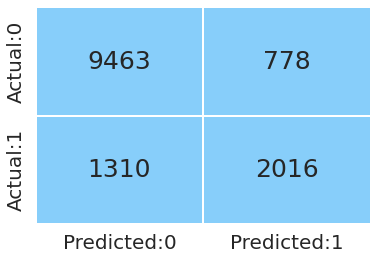

In [55]:
plot_confusion_matrix(model)

In [56]:
test_report = get_test_report(model)
print(test_report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     10241
           1       0.72      0.61      0.66      3326

    accuracy                           0.85     13567
   macro avg       0.80      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567



In [57]:
update_score_card(model_name = 'Logistic Regression')

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.721546,0.606133,0.846097,0.658824


Further to this, the model can be training and tested using Support Vector Machine and Random Forest Classifier

In [58]:
from sklearn.svm import SVC
model=SVC(kernel='poly',degree = 2,gamma = 'auto',C = 1).fit(trainX,trainY)
y_pred = model.predict(testX)
update_score_card(model_name = 'Support Vector Machine Classifier')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.721546,0.606133,0.846097,0.658824
1,Support Vector Machine Classifier,0.746868,0.609441,0.853615,0.671192


In [59]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators = 100,max_depth = 8,max_leaf_nodes= 15, min_samples_leaf= 10,min_samples_split =15,random_state = 40).fit(trainX,trainY)
y_pred = model.predict(testX)
update_score_card(model_name = 'RF Classifier')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.721546,0.606133,0.846097,0.658824
1,Support Vector Machine Classifier,0.746868,0.609441,0.853615,0.671192
2,RF Classifier,0.825447,0.472038,0.846097,0.600612


Training, testing and Model Evaluation with balanced class weights to eliminate the effect of skewness in data

In [60]:
log_reg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
model=log_reg.fit(trainX, trainY)
y_pred = model.predict(testX)
update_score_card(model_name = 'Weighted Logistic Regression')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.721546,0.606133,0.846097,0.658824
1,Support Vector Machine Classifier,0.746868,0.609441,0.853615,0.671192
2,RF Classifier,0.825447,0.472038,0.846097,0.600612
3,Weighted Logistic Regression,0.566015,0.844257,0.803125,0.677688


In [61]:
model=SVC(kernel='poly',degree = 2,gamma = 'auto',C = 1,class_weight='balanced').fit(trainX,trainY)
y_pred = model.predict(testX)
update_score_card(model_name = 'Weighted Support Vector Machine Classifier')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.721546,0.606133,0.846097,0.658824
1,Support Vector Machine Classifier,0.746868,0.609441,0.853615,0.671192
2,RF Classifier,0.825447,0.472038,0.846097,0.600612
3,Weighted Logistic Regression,0.566015,0.844257,0.803125,0.677688
4,Weighted Support Vector Machine Classifier,0.570034,0.860192,0.806663,0.685680


In [62]:
model=RandomForestClassifier(n_estimators = 100,max_depth = 8,max_leaf_nodes= 15, min_samples_leaf= 10,min_samples_split =15,random_state = 40,class_weight='balanced').fit(trainX,trainY)
y_pred = model.predict(testX)
update_score_card(model_name = 'Weighted RF Classifier')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.721546,0.606133,0.846097,0.658824
1,Support Vector Machine Classifier,0.746868,0.609441,0.853615,0.671192
2,RF Classifier,0.825447,0.472038,0.846097,0.600612
3,Weighted Logistic Regression,0.566015,0.844257,0.803125,0.677688
4,Weighted Support Vector Machine Classifier,0.570034,0.860192,0.806663,0.685680
5,Weighted RF Classifier,0.502225,0.882141,0.756763,0.640052


* Performing Feature selection before training and testing the Model

Scikit-learn API provides SelectKBest class for extracting best features of given dataset. The SelectKBest method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training. It helps us to eliminate less important part of the data and reduce a training time.

In [63]:
#Feature selection: Select K best features

from sklearn.feature_selection import SelectKBest,chi2
trainX=pd.DataFrame(trainX)
np.seterr(divide='ignore',invalid='ignore')
kbest_selector=SelectKBest(k=trainX.shape[1])

training_selected_features=kbest_selector.fit_transform(trainX,trainY)

selected_cols = kbest_selector.get_support(indices=True)
selected_feature_names = trainX.columns.values[selected_cols]

training_selected_features=pd.DataFrame(training_selected_features)

scores = kbest_selector.scores_[kbest_selector.get_support()]
selected_feature_names_scores = list(zip(selected_feature_names, scores))

Feat_F1score_combined = pd.DataFrame(data = selected_feature_names_scores, columns=['Feature_names', 'F_Scores'])
Feat_F1score_combined = Feat_F1score_combined.sort_values(['F_Scores', 'Feature_names'], ascending = [False, True])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


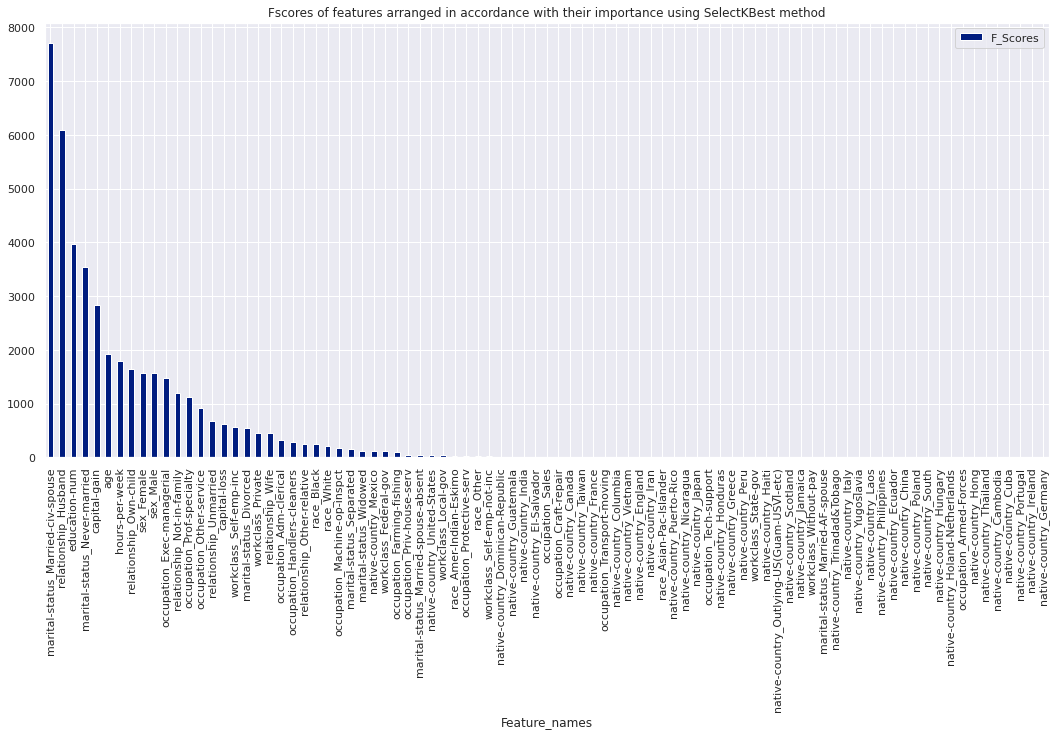

In [64]:
Feat_F1score_combined.plot(x='Feature_names',y='F_Scores',kind='bar',title='Fscores of features arranged in accordance with their importance using SelectKBest method',figsize=(18,8))
#Setting the F score threshold as 20, we get a total of 20 features which have F scores beyond this value

kbest_selector=SelectKBest(k=20)
trainX=kbest_selector.fit_transform(trainX,trainY)

In [65]:
testX=pd.DataFrame(testX)
np.seterr(divide='ignore',invalid='ignore')
kbest_selector=SelectKBest(k=testX.shape[1])

testing_selected_features=kbest_selector.fit_transform(testX,testY)

selected_cols = kbest_selector.get_support(indices=True)
selected_feature_names = testX.columns.values[selected_cols]

testing_selected_features=pd.DataFrame(testing_selected_features)

scores = kbest_selector.scores_[kbest_selector.get_support()]
selected_feature_names_scores = list(zip(selected_feature_names, scores))

Feat_F1score_combined = pd.DataFrame(data = selected_feature_names_scores, columns=['Feature_names', 'F_Scores'])
Feat_F1score_combined = Feat_F1score_combined.sort_values(['F_Scores', 'Feature_names'], ascending = [False, True])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


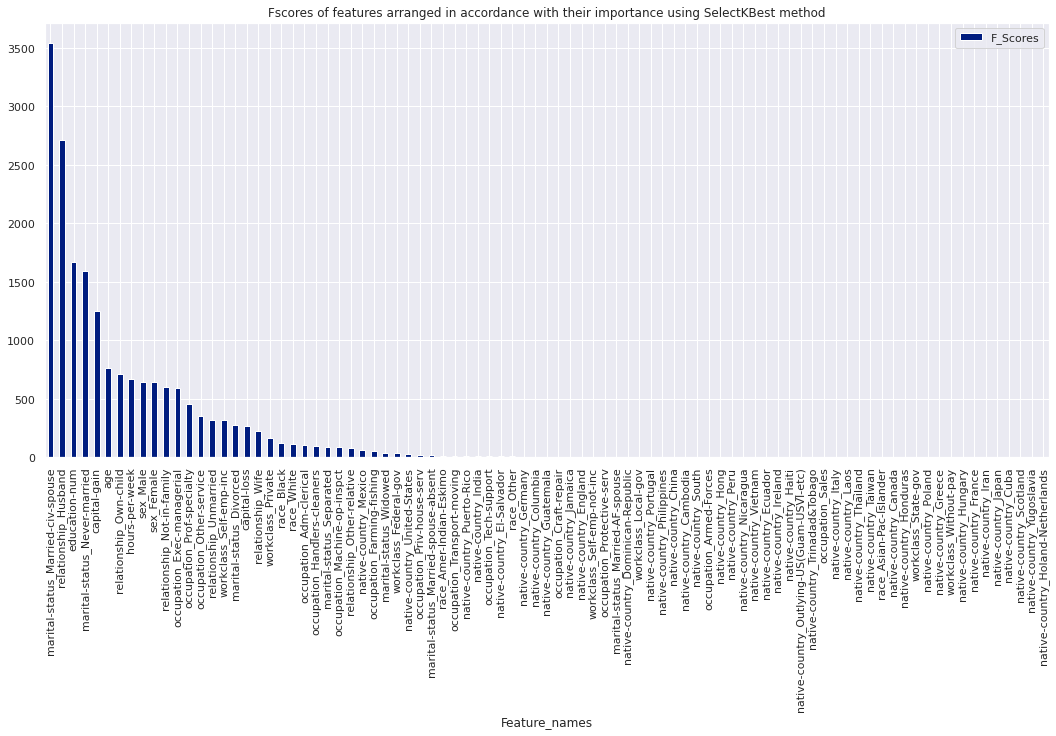

In [66]:
Feat_F1score_combined.plot(x='Feature_names',y='F_Scores',kind='bar',title='Fscores of features arranged in accordance with their importance using SelectKBest method',figsize=(18,8))
#Setting the F score threshold as 20, we get a total of 20 features which have F scores beyond this value

kbest_selector=SelectKBest(k=20)
testX=kbest_selector.fit_transform(testX,testY)

In [67]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)
model=log_reg.fit(trainX, trainY)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
y_pred = model.predict(testX)

In [69]:
update_score_card(model_name = 'Logistic Regression with Feature selection')

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.721546,0.606133,0.846097,0.658824
1,Support Vector Machine Classifier,0.746868,0.609441,0.853615,0.671192
2,RF Classifier,0.825447,0.472038,0.846097,0.600612
3,Weighted Logistic Regression,0.566015,0.844257,0.803125,0.677688
4,Weighted Support Vector Machine Classifier,0.570034,0.860192,0.806663,0.685680
5,Weighted RF Classifier,0.502225,0.882141,0.756763,0.640052
6,Logistic Regression with Feature selection,0.720777,0.591401,0.843665,0.649711


In [70]:
model=SVC(kernel='poly',degree = 2,gamma = 'auto',C = 1).fit(trainX,trainY)
y_pred = model.predict(testX)
update_score_card(model_name = 'Support Vector Machine Classifier with Feature selection')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.721546,0.606133,0.846097,0.658824
1,Support Vector Machine Classifier,0.746868,0.609441,0.853615,0.671192
2,RF Classifier,0.825447,0.472038,0.846097,0.600612
3,Weighted Logistic Regression,0.566015,0.844257,0.803125,0.677688
4,Weighted Support Vector Machine Classifier,0.570034,0.860192,0.806663,0.685680
5,Weighted RF Classifier,0.502225,0.882141,0.756763,0.640052
6,Logistic Regression with Feature selection,0.720777,0.591401,0.843665,0.649711
7,Support Vector Machine Classifier with Feature...,0.761355,0.594708,0.854942,0.667792


In [71]:
model=RandomForestClassifier(n_estimators = 100,max_depth = 8,max_leaf_nodes= 15, min_samples_leaf= 10,min_samples_split =15,random_state = 40).fit(trainX,trainY)
y_pred = model.predict(testX)
update_score_card(model_name = 'RF Classifier with Feature selection')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.721546,0.606133,0.846097,0.658824
1,Support Vector Machine Classifier,0.746868,0.609441,0.853615,0.671192
2,RF Classifier,0.825447,0.472038,0.846097,0.600612
3,Weighted Logistic Regression,0.566015,0.844257,0.803125,0.677688
4,Weighted Support Vector Machine Classifier,0.570034,0.860192,0.806663,0.685680
5,Weighted RF Classifier,0.502225,0.882141,0.756763,0.640052
6,Logistic Regression with Feature selection,0.720777,0.591401,0.843665,0.649711
7,Support Vector Machine Classifier with Feature...,0.761355,0.594708,0.854942,0.667792
8,RF Classifier with Feature selection,0.788302,0.542995,0.852215,0.643048


* Performing feature selection before training and testing model with balanced weights

In [72]:
log_reg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
model=log_reg.fit(trainX, trainY)
y_pred = model.predict(testX)
update_score_card(model_name = 'Weighted Logistic Regression with Feature Selction')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.721546,0.606133,0.846097,0.658824
1,Support Vector Machine Classifier,0.746868,0.609441,0.853615,0.671192
2,RF Classifier,0.825447,0.472038,0.846097,0.600612
3,Weighted Logistic Regression,0.566015,0.844257,0.803125,0.677688
4,Weighted Support Vector Machine Classifier,0.570034,0.860192,0.806663,0.685680
5,Weighted RF Classifier,0.502225,0.882141,0.756763,0.640052
6,Logistic Regression with Feature selection,0.720777,0.591401,0.843665,0.649711
7,Support Vector Machine Classifier with Feature...,0.761355,0.594708,0.854942,0.667792
8,RF Classifier with Feature selection,0.788302,0.542995,0.852215,0.643048
9,Weighted Logistic Regression with Feature Selc...,0.554940,0.842754,0.795754,0.669213


In [73]:
model=SVC(kernel='poly',degree = 2,gamma = 'auto',C = 1,class_weight='balanced').fit(trainX,trainY)
y_pred = model.predict(testX)
update_score_card(model_name = 'Weighted Support Vector Machine Classifier with Feature Selection')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.721546,0.606133,0.846097,0.658824
1,Support Vector Machine Classifier,0.746868,0.609441,0.853615,0.671192
2,RF Classifier,0.825447,0.472038,0.846097,0.600612
3,Weighted Logistic Regression,0.566015,0.844257,0.803125,0.677688
4,Weighted Support Vector Machine Classifier,0.570034,0.860192,0.806663,0.685680
5,Weighted RF Classifier,0.502225,0.882141,0.756763,0.640052
6,Logistic Regression with Feature selection,0.720777,0.591401,0.843665,0.649711
7,Support Vector Machine Classifier with Feature...,0.761355,0.594708,0.854942,0.667792
8,RF Classifier with Feature selection,0.788302,0.542995,0.852215,0.643048
9,Weighted Logistic Regression with Feature Selc...,0.554940,0.842754,0.795754,0.669213


In [74]:
model=RandomForestClassifier(n_estimators = 100,max_depth = 8,max_leaf_nodes= 15, min_samples_leaf= 10,min_samples_split =15,random_state = 40,class_weight='balanced').fit(trainX,trainY)
y_pred = model.predict(testX)
update_score_card(model_name = 'Weighted RF Classifier with Feature Selection')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.721546,0.606133,0.846097,0.658824
1,Support Vector Machine Classifier,0.746868,0.609441,0.853615,0.671192
2,RF Classifier,0.825447,0.472038,0.846097,0.600612
3,Weighted Logistic Regression,0.566015,0.844257,0.803125,0.677688
4,Weighted Support Vector Machine Classifier,0.570034,0.860192,0.806663,0.685680
5,Weighted RF Classifier,0.502225,0.882141,0.756763,0.640052
6,Logistic Regression with Feature selection,0.720777,0.591401,0.843665,0.649711
7,Support Vector Machine Classifier with Feature...,0.761355,0.594708,0.854942,0.667792
8,RF Classifier with Feature selection,0.788302,0.542995,0.852215,0.643048
9,Weighted Logistic Regression with Feature Selc...,0.554940,0.842754,0.795754,0.669213


# Imputing cloumns having Missing values with suitable data and performing Prepocessing on train and test datasets, through data handling pipelines

In [75]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,8.947546,0.0,40,United-States,>50K
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0.000000,0.0,30,United-States,<=50K


In [76]:
Y=df["income"]
X=df.drop('income', axis = 1)

* Splitting the dataset

In [77]:
trainX,testX,trainY,testY=train_test_split(X,Y,test_size=0.30, random_state=42,shuffle=True)
print('trainX:',trainX.shape)
print('trainY:',trainY.shape)
print('testX:',testX.shape)
print('testY:',testY.shape)

trainX: (34189, 12)
trainY: (34189,)
testX: (14653, 12)
testY: (14653,)


Creating Data handling pipeline

In [78]:
# Importing libraries
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from pandas.api.types import CategoricalDtype

In [79]:
# Column Selctor pipeline, where in The BaseEstimator lets us get the set_params() and get_params() methods that are helpful in hyperparameter tuning.

class ColumnsSelector(BaseEstimator, TransformerMixin):
  
  def __init__(self, type):
    self.type = type
  
  def fit(self, X, y=None):
    return self
  
  def transform(self,X):
    return X.select_dtypes(include=[self.type])

In [80]:
# Numerical data Pipeline
num_pipeline = Pipeline(steps=[
    ("num_attr_selector", ColumnsSelector(type='int')),
    ("scaler", MinMaxScaler())
])

In [81]:
# Categorical Data Pipeline, 
class CategoricalImputer(BaseEstimator, TransformerMixin):
  
  def __init__(self, columns = None, strategy='most_frequent'):
    self.columns = columns
    self.strategy = strategy
    
    
  def fit(self,X, y=None):
    if self.columns is None:
      self.columns = X.columns
    
    if self.strategy is 'most_frequent':
      self.fill = {column: X[column].value_counts().index[0] for 
        column in self.columns}
    else:
      self.fill ={column: '0' for column in self.columns}
      
    return self
      
  def transform(self,X):
    X_copy = X.copy()
    for column in self.columns:
      X_copy[column] = X_copy[column].fillna(self.fill[column])
    return X_copy

class CategoricalEncoder(BaseEstimator, TransformerMixin):
  
  def __init__(self, dropFirst=True):
    self.categories=dict()
    self.dropFirst=dropFirst
    
  def fit(self, X, y=None):
    join_df = pd.concat([trainX, testX])
    join_df = join_df.select_dtypes(include=['object'])
    for column in join_df.columns:
      self.categories[column] = join_df[column].value_counts().index.tolist()
    return self
    
  def transform(self, X):
    X_copy = X.copy()
    X_copy = X_copy.select_dtypes(include=['object'])
    for column in X_copy.columns:
      X_copy[column] = X_copy[column].astype({column:CategoricalDtype(self.categories[column])})
    return pd.get_dummies(X_copy, drop_first=self.dropFirst)

cat_pipeline = Pipeline(steps=[
    ("cat_attr_selector", ColumnsSelector(type='object')),
    ("cat_imputer", CategoricalImputer(columns=
          ['workclass','occupation', 'native-country'])),
    ("encoder", CategoricalEncoder(dropFirst=True))
])

In [82]:
full_pipeline = FeatureUnion([("num_pipe", num_pipeline), 
                ("cat_pipeline", cat_pipeline)])

In [83]:
X_train_processed= full_pipeline.fit_transform(trainX)
from sklearn.preprocessing import LabelEncoder
trainY=pd.DataFrame(LabelEncoder().fit_transform(trainY))

In [84]:
X_test_processed = full_pipeline.fit_transform(testX)
testY=pd.DataFrame(LabelEncoder().fit_transform(testY))

* Training, Testing and Model Evaluation

In [85]:
score_card2 = pd.DataFrame(columns=['Model','Precision Score', 'Recall Score', 'Accuracy Score',
                                   'f1-score'])
def update_score_card2(model_name):
    
    # assign 'score_card' as global variable
    global score_card2

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card2 = score_card2.append({'Model': model_name,
                                     'Precision Score': metrics.precision_score(testY, y_pred),
                                    'Recall Score': metrics.recall_score(testY, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(testY, y_pred),
                                    'f1-score': metrics.f1_score(testY, y_pred)}, 
                                    ignore_index = True)
    return(score_card2)

In [86]:
model = LogisticRegression(solver='lbfgs',max_iter=10000)
model.fit(X_train_processed, trainY)
y_pred = model.predict(X_test_processed)
update_score_card2(model_name = 'Logistic Regression')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.696547,0.554386,0.839623,0.617388


In [87]:
model = SVC(kernel='poly',degree = 2,gamma = 'auto',C = 1)
model.fit(X_train_processed, trainY)
y_pred = model.predict(X_test_processed)
update_score_card2(model_name = 'SVClassifier')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.696547,0.554386,0.839623,0.617388
1,SVClassifier,0.000000,0.000000,0.766601,0.000000


In [88]:
model = RandomForestClassifier(n_estimators = 100,max_depth = 8,max_leaf_nodes= 15, min_samples_leaf= 10,min_samples_split =15,random_state = 40)
model.fit(X_train_processed, trainY)
y_pred = model.predict(X_test_processed)
update_score_card2(model_name = 'Random Forest Classifier')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.696547,0.554386,0.839623,0.617388
1,SVClassifier,0.000000,0.000000,0.766601,0.000000
2,Random Forest Classifier,0.775319,0.338012,0.822630,0.470780


In [89]:
from sklearn.cluster import KMeans
# building a K-Means model for K = 2
model = KMeans(n_clusters=2, random_state=100)
# fit the model
model.fit(X_train_processed,trainY)
y_pred = model.predict(X_test_processed)
update_score_card2(model_name = 'Kmeans')

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.696547,0.554386,0.839623,0.617388
1,SVClassifier,0.000000,0.000000,0.766601,0.000000
2,Random Forest Classifier,0.775319,0.338012,0.822630,0.470780
3,Kmeans,0.046563,0.067544,0.459565,0.055125


* Training, testing and Model Evaluation with balanced class weight

In [90]:
model = LogisticRegression(solver='lbfgs',max_iter=10000,class_weight='balanced' )
model.fit(X_train_processed, trainY)
y_pred = model.predict(X_test_processed)
update_score_card2(model_name = ' Weighted Logistic Regression')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.696547,0.554386,0.839623,0.617388
1,SVClassifier,0.000000,0.000000,0.766601,0.000000
2,Random Forest Classifier,0.775319,0.338012,0.822630,0.470780
3,Kmeans,0.046563,0.067544,0.459565,0.055125
4,Weighted Logistic Regression,0.531503,0.843567,0.789941,0.652125


In [91]:
model = SVC(kernel='poly',degree = 2,gamma = 'auto',C = 1,class_weight='balanced')
model.fit(X_train_processed, trainY)
y_pred = model.predict(X_test_processed)
update_score_card2(model_name = 'Weighted SVClassifier')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.696547,0.554386,0.839623,0.617388
1,SVClassifier,0.000000,0.000000,0.766601,0.000000
2,Random Forest Classifier,0.775319,0.338012,0.822630,0.470780
3,Kmeans,0.046563,0.067544,0.459565,0.055125
4,Weighted Logistic Regression,0.531503,0.843567,0.789941,0.652125
5,Weighted SVClassifier,0.436761,0.875439,0.707432,0.582774


In [92]:
model = RandomForestClassifier(n_estimators = 100,max_depth = 8,max_leaf_nodes= 15, min_samples_leaf= 10,min_samples_split =15,random_state = 40,class_weight='balanced')
model.fit(X_train_processed, trainY)
y_pred = model.predict(X_test_processed)
update_score_card2(model_name = 'Weighted Random Forest Classifier')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.696547,0.554386,0.839623,0.617388
1,SVClassifier,0.000000,0.000000,0.766601,0.000000
2,Random Forest Classifier,0.775319,0.338012,0.822630,0.470780
3,Kmeans,0.046563,0.067544,0.459565,0.055125
4,Weighted Logistic Regression,0.531503,0.843567,0.789941,0.652125
5,Weighted SVClassifier,0.436761,0.875439,0.707432,0.582774
6,Weighted Random Forest Classifier,0.497449,0.855263,0.764553,0.629032


* Performing feature selection before training and testing the model

In [93]:
X_train_processed=pd.DataFrame(X_train_processed)
np.seterr(divide='ignore',invalid='ignore')
kbest_selector=SelectKBest(k=X_train_processed.shape[1])

training_selected_features=kbest_selector.fit_transform(X_train_processed,trainY)

selected_cols = kbest_selector.get_support(indices=True)
selected_feature_names = X_train_processed.columns.values[selected_cols]

training_selected_features=pd.DataFrame(training_selected_features)

scores = kbest_selector.scores_[kbest_selector.get_support()]
selected_feature_names_scores = list(zip(selected_feature_names, scores))

Feat_F1score_combined = pd.DataFrame(data = selected_feature_names_scores, columns=['Feature_names', 'F_Scores'])
Feat_F1score_combined = Feat_F1score_combined.sort_values(['F_Scores', 'Feature_names'], ascending = [False, True])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


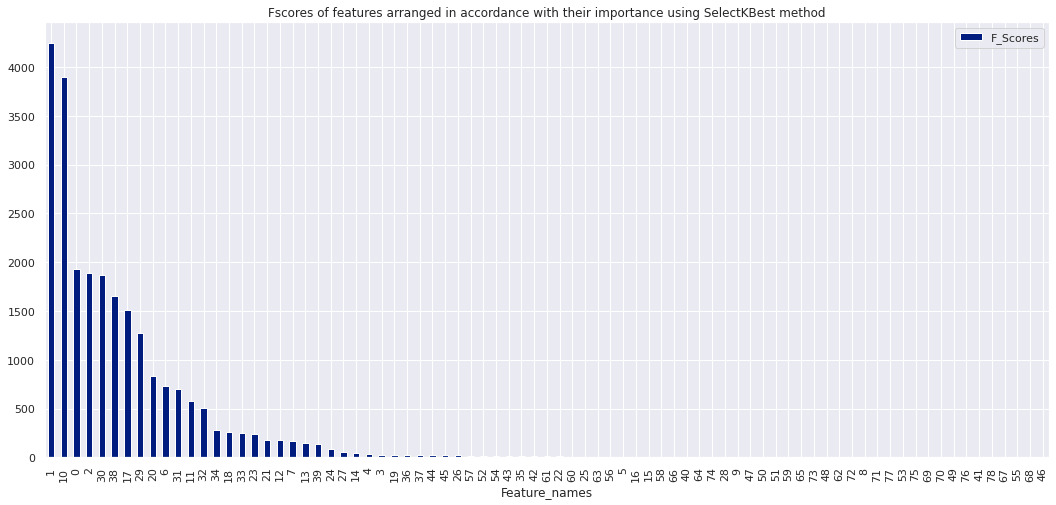

In [94]:
Feat_F1score_combined.plot(x='Feature_names',y='F_Scores',kind='bar',title='Fscores of features arranged in accordance with their importance using SelectKBest method',figsize=(18,8))
#Setting the F score threshold as 22, we get a total of 30 features which have F scores beyond this value

kbest_selector=SelectKBest(k=22)
X_train_selected=kbest_selector.fit_transform(X_train_processed,trainY)

In [95]:
X_test_processed=pd.DataFrame(X_test_processed)
np.seterr(divide='ignore',invalid='ignore')
kbest_selector=SelectKBest(k=X_test_processed.shape[1])

testing_selected_features=kbest_selector.fit_transform(X_test_processed,testY)

selected_cols = kbest_selector.get_support(indices=True)
selected_feature_names = X_test_processed.columns.values[selected_cols]

testing_selected_features=pd.DataFrame(testing_selected_features)

scores = kbest_selector.scores_[kbest_selector.get_support()]
selected_feature_names_scores = list(zip(selected_feature_names, scores))

Feat_F1score_combined = pd.DataFrame(data = selected_feature_names_scores, columns=['Feature_names', 'F_Scores'])
Feat_F1score_combined = Feat_F1score_combined.sort_values(['F_Scores', 'Feature_names'], ascending = [False, True])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


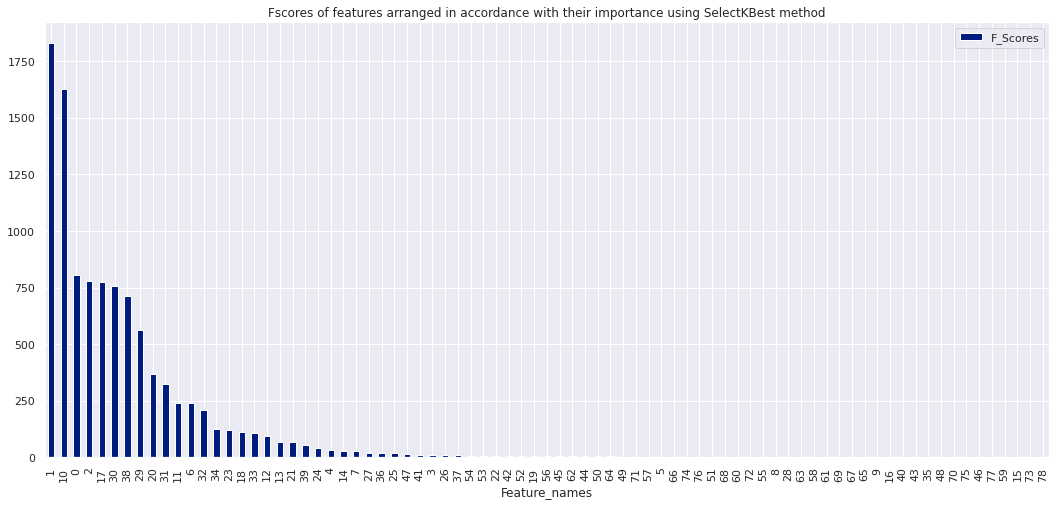

In [96]:
Feat_F1score_combined.plot(x='Feature_names',y='F_Scores',kind='bar',title='Fscores of features arranged in accordance with their importance using SelectKBest method',figsize=(18,8))
#Setting the F score threshold as 30, we get a total of 30 features which have F scores beyond this value

kbest_selector=SelectKBest(k=22)
X_test_selected=kbest_selector.fit_transform(X_test_processed,testY)

In [97]:
model = LogisticRegression(solver='lbfgs',max_iter=10000)
model.fit(X_train_selected, trainY)
y_pred = model.predict(X_test_selected)
update_score_card2(model_name = 'Logistic Regression with Feature Selection')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.696547,0.554386,0.839623,0.617388
1,SVClassifier,0.000000,0.000000,0.766601,0.000000
2,Random Forest Classifier,0.775319,0.338012,0.822630,0.470780
3,Kmeans,0.046563,0.067544,0.459565,0.055125
4,Weighted Logistic Regression,0.531503,0.843567,0.789941,0.652125
5,Weighted SVClassifier,0.436761,0.875439,0.707432,0.582774
6,Weighted Random Forest Classifier,0.497449,0.855263,0.764553,0.629032
7,Logistic Regression with Feature Selection,0.622068,0.473099,0.809937,0.537452


In [98]:
model = SVC(kernel='poly',degree = 2,gamma = 'auto',C = 1)
model.fit(X_train_selected, trainY)
y_pred = model.predict(X_test_selected)
update_score_card2(model_name = 'SVClassifier with Feature Selection')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.696547,0.554386,0.839623,0.617388
1,SVClassifier,0.000000,0.000000,0.766601,0.000000
2,Random Forest Classifier,0.775319,0.338012,0.822630,0.470780
3,Kmeans,0.046563,0.067544,0.459565,0.055125
4,Weighted Logistic Regression,0.531503,0.843567,0.789941,0.652125
5,Weighted SVClassifier,0.436761,0.875439,0.707432,0.582774
6,Weighted Random Forest Classifier,0.497449,0.855263,0.764553,0.629032
7,Logistic Regression with Feature Selection,0.622068,0.473099,0.809937,0.537452
8,SVClassifier with Feature Selection,0.632411,0.187135,0.784890,0.288809


In [99]:
model = RandomForestClassifier(n_estimators = 100,max_depth = 8,max_leaf_nodes= 15, min_samples_leaf= 10,min_samples_split =15,random_state = 40)
model.fit(X_train_selected, trainY)
y_pred = model.predict(X_test_selected)
update_score_card2(model_name = 'Random Forest Classifier with Feature selection')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.696547,0.554386,0.839623,0.617388
1,SVClassifier,0.000000,0.000000,0.766601,0.000000
2,Random Forest Classifier,0.775319,0.338012,0.822630,0.470780
3,Kmeans,0.046563,0.067544,0.459565,0.055125
4,Weighted Logistic Regression,0.531503,0.843567,0.789941,0.652125
5,Weighted SVClassifier,0.436761,0.875439,0.707432,0.582774
6,Weighted Random Forest Classifier,0.497449,0.855263,0.764553,0.629032
7,Logistic Regression with Feature Selection,0.622068,0.473099,0.809937,0.537452
8,SVClassifier with Feature Selection,0.632411,0.187135,0.784890,0.288809
9,Random Forest Classifier with Feature selection,0.741768,0.375439,0.823722,0.498544


In [100]:
from sklearn.cluster import KMeans
# building a K-Means model for K = 2
model = KMeans(n_clusters=2, random_state=100)
# fit the model
model.fit(X_train_selected,trainY)
y_pred = model.predict(X_test_selected)
update_score_card2(model_name = 'Kmeans with Feature Selection')

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.696547,0.554386,0.839623,0.617388
1,SVClassifier,0.000000,0.000000,0.766601,0.000000
2,Random Forest Classifier,0.775319,0.338012,0.822630,0.470780
3,Kmeans,0.046563,0.067544,0.459565,0.055125
4,Weighted Logistic Regression,0.531503,0.843567,0.789941,0.652125
5,Weighted SVClassifier,0.436761,0.875439,0.707432,0.582774
6,Weighted Random Forest Classifier,0.497449,0.855263,0.764553,0.629032
7,Logistic Regression with Feature Selection,0.622068,0.473099,0.809937,0.537452
8,SVClassifier with Feature Selection,0.632411,0.187135,0.784890,0.288809
9,Random Forest Classifier with Feature selection,0.741768,0.375439,0.823722,0.498544


* Performing feature selction before training & testing model with balanced weights

In [101]:
model = LogisticRegression(solver='lbfgs',max_iter=10000,class_weight='balanced' )
model.fit(X_train_selected, trainY)
y_pred = model.predict(X_test_selected)
update_score_card2(model_name = ' Weighted Logistic Regression with Feature Selection')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.696547,0.554386,0.839623,0.617388
1,SVClassifier,0.000000,0.000000,0.766601,0.000000
2,Random Forest Classifier,0.775319,0.338012,0.822630,0.470780
3,Kmeans,0.046563,0.067544,0.459565,0.055125
4,Weighted Logistic Regression,0.531503,0.843567,0.789941,0.652125
5,Weighted SVClassifier,0.436761,0.875439,0.707432,0.582774
6,Weighted Random Forest Classifier,0.497449,0.855263,0.764553,0.629032
7,Logistic Regression with Feature Selection,0.622068,0.473099,0.809937,0.537452
8,SVClassifier with Feature Selection,0.632411,0.187135,0.784890,0.288809
9,Random Forest Classifier with Feature selection,0.741768,0.375439,0.823722,0.498544


In [102]:
model = SVC(kernel='poly',degree = 2,gamma = 'auto',C = 1,class_weight='balanced')
model.fit(X_train_selected, trainY)
y_pred = model.predict(X_test_selected)
update_score_card2(model_name = 'Weighted SVClassifier with Feature Selection')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.696547,0.554386,0.839623,0.617388
1,SVClassifier,0.000000,0.000000,0.766601,0.000000
2,Random Forest Classifier,0.775319,0.338012,0.822630,0.470780
3,Kmeans,0.046563,0.067544,0.459565,0.055125
4,Weighted Logistic Regression,0.531503,0.843567,0.789941,0.652125
5,Weighted SVClassifier,0.436761,0.875439,0.707432,0.582774
6,Weighted Random Forest Classifier,0.497449,0.855263,0.764553,0.629032
7,Logistic Regression with Feature Selection,0.622068,0.473099,0.809937,0.537452
8,SVClassifier with Feature Selection,0.632411,0.187135,0.784890,0.288809
9,Random Forest Classifier with Feature selection,0.741768,0.375439,0.823722,0.498544


In [103]:
model = RandomForestClassifier(n_estimators = 100,max_depth = 8,max_leaf_nodes= 15, min_samples_leaf= 10,min_samples_split =15,random_state = 40,class_weight='balanced')
model.fit(X_train_selected, trainY)
y_pred = model.predict(X_test_selected)
update_score_card2(model_name = 'Weighted Random Forest Classifier with Feature Selection')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.696547,0.554386,0.839623,0.617388
1,SVClassifier,0.000000,0.000000,0.766601,0.000000
2,Random Forest Classifier,0.775319,0.338012,0.822630,0.470780
3,Kmeans,0.046563,0.067544,0.459565,0.055125
4,Weighted Logistic Regression,0.531503,0.843567,0.789941,0.652125
5,Weighted SVClassifier,0.436761,0.875439,0.707432,0.582774
6,Weighted Random Forest Classifier,0.497449,0.855263,0.764553,0.629032
7,Logistic Regression with Feature Selection,0.622068,0.473099,0.809937,0.537452
8,SVClassifier with Feature Selection,0.632411,0.187135,0.784890,0.288809
9,Random Forest Classifier with Feature selection,0.741768,0.375439,0.823722,0.498544


# SMOTE and RandomUnderSampler for Balancing Data

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

The most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.” SMOTE as a data preparation method when fitting and evaluating machine learning algorithms in scikit-learn.

It is believed that SMOTE performs better when combined with undersampling of the majority class, such as random undersampling.

In [104]:
X_train_selected.shape, trainY.shape

((34189, 22), (34189, 1))

In [105]:
X_test_selected.shape, testY.shape

((14653, 22), (14653, 1))

In [106]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy= 0.5,random_state=2)
X_train_SMOTE, trainY_SMOTE = over.fit_resample(X_train_selected, trainY)
X_test_SMOTE, testY_SMOTE = over.fit_resample(X_test_selected, testY)

In [107]:
X_train_SMOTE.shape, trainY_SMOTE.shape

((38883, 22), (38883, 1))

In [108]:
score_card3 = pd.DataFrame(columns=['Model','Precision Score', 'Recall Score', 'Accuracy Score',
                                   'f1-score'])
def update_score_card3(model_name):
    
    # assign 'score_card' as global variable
    global score_card3

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card3 = score_card3.append({'Model': model_name,
                                     'Precision Score': metrics.precision_score(testY_SMOTE, y_pred),
                                    'Recall Score': metrics.recall_score(testY_SMOTE, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(testY_SMOTE, y_pred),
                                    'f1-score': metrics.f1_score(testY_SMOTE, y_pred)}, 
                                    ignore_index = True)
    return(score_card3)

In [109]:
model = LogisticRegression(solver='lbfgs',max_iter=100000)
model.fit(X_train_SMOTE, trainY_SMOTE)
y_pred = model.predict(X_test_SMOTE)
update_score_card3(model_name= "Logistic Regression on SMOTE")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression on SMOTE,0.655613,0.630164,0.766396,0.642637


In [110]:
model = SVC(kernel='poly',degree = 2,gamma = 'auto',C = 1)
model.fit(X_train_SMOTE, trainY_SMOTE)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, degree=2, gamma='auto', kernel='poly')

In [111]:
y_pred = model.predict(X_test_SMOTE)

In [112]:
update_score_card3(model_name= "SVClassifier on SMOTE")

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression on SMOTE,0.655613,0.630164,0.766396,0.642637
1,SVClassifier on SMOTE,0.688696,0.621617,0.780224,0.653439


In [113]:
model = RandomForestClassifier(n_estimators = 100,max_depth = 8,max_leaf_nodes= 15, min_samples_leaf= 10,min_samples_split =15,random_state = 40)
model.fit(X_train_SMOTE, trainY_SMOTE)
y_pred = model.predict(X_test_SMOTE)
update_score_card3(model_name="Random Forest Classifier on SMOTE")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression on SMOTE,0.655613,0.630164,0.766396,0.642637
1,SVClassifier on SMOTE,0.688696,0.621617,0.780224,0.653439
2,Random Forest Classifier on SMOTE,0.722247,0.586182,0.786931,0.647140


In [114]:
under = RandomUnderSampler(random_state=2)
X_train_SMOTERand, trainY_SMOTERand = under.fit_resample(X_train_SMOTE, trainY_SMOTE)
X_test_SMOTERand, testY_SMOTERand = under.fit_resample(X_test_SMOTE, testY_SMOTE)

In [115]:
X_train_SMOTERand.shape, trainY_SMOTERand.shape

((25922, 22), (25922, 1))

In [116]:
X_test_SMOTERand.shape, testY_SMOTERand.shape

((11232, 22), (11232, 1))

In [117]:
score_card4 = pd.DataFrame(columns=['Model','Precision Score', 'Recall Score', 'Accuracy Score',
                                   'f1-score'])
def update_score_card4(model_name):
    
    # assign 'score_card' as global variable
    global score_card4

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card4 = score_card4.append({'Model': model_name,
                                     'Precision Score': metrics.precision_score(testY_SMOTERand, y_pred),
                                    'Recall Score': metrics.recall_score(testY_SMOTERand, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(testY_SMOTERand, y_pred),
                                    'f1-score': metrics.f1_score(testY_SMOTERand, y_pred)}, 
                                    ignore_index = True)
    return(score_card4)

In [118]:
model = LogisticRegression(solver='lbfgs',max_iter=100000)
model.fit(X_train_SMOTERand, trainY_SMOTERand)
y_pred = model.predict(X_test_SMOTERand)
update_score_card4(model_name= "Logistic Regression on SMOTE and RandomUnderSampler")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression on SMOTE and RandomUnderSa...,0.716934,0.826211,0.75,0.767704


In [119]:
model = SVC(kernel='poly',degree = 2,gamma = 'auto',C = 1)
model.fit(X_train_SMOTERand, trainY_SMOTERand)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, degree=2, gamma='auto', kernel='poly')

In [120]:
y_pred = model.predict(X_test_SMOTERand)

In [121]:
update_score_card4(model_name= "SVClassifier on SMOTE and RandomUnderSampler")

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression on SMOTE and RandomUnderSa...,0.716934,0.826211,0.750000,0.767704
1,SVClassifier on SMOTE and RandomUnderSampler,0.652499,0.902066,0.710826,0.757250


In [122]:
model = RandomForestClassifier(n_estimators = 100,max_depth = 8,max_leaf_nodes= 15, min_samples_leaf= 10,min_samples_split =15,random_state = 40)
model.fit(X_train_SMOTERand, trainY_SMOTERand)
y_pred = model.predict(X_test_SMOTERand)
update_score_card4(model_name="Random Forest Classifier on SMOTE and RandomUnderSampler")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression on SMOTE and RandomUnderSa...,0.716934,0.826211,0.750000,0.767704
1,SVClassifier on SMOTE and RandomUnderSampler,0.652499,0.902066,0.710826,0.757250
2,Random Forest Classifier on SMOTE and RandomUn...,0.759116,0.856303,0.792290,0.804786


It is seen that SMOTE and RandomUnderSampling together work better in increasing the F1 score, as compared to SMOTE only.

It may also be noticed from above that balanced weights though decrease the accuracy sometimes but increase the recall- score. Recall score expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.

Selected features tell the CharityML whom to target for their donation in a better way based on their Income.

Based on previous experiance CharityML has listed down few categoriy of individuals who usually donate. These are unproven analogies.

1) Higher income or fianncially stable indiduals

2) As individual grows older, they become more involved to the community and are inclined to give back.

3) Women usually donate more

4) Married couple usually are more likely to donate compared to singles.

5) Highly educated individuals are more aware of social problems and tend to volunteer themselves in doantions

6) Employed individuals are more likely to donate compared to unemployed and retired as they lack income source. Upon that those who usually work for extra hours

Out of the above 4), 5) and 6) almost seems true by looking at the selected features, because these actually depends in predicting income.